## สร้างกราฟด้วย small-world model (Watts and Strogatz)

สร้างตามที่ระบุในเปเปอร์โดย [Kleinberg](http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch20.pdf) โหนดในกราฟจะเป็นจุดบนระนาบ 2 มิติ (แทนด้วย `w` x `h`) จะมีพารามิเตอร์สองตัวคือ ทุกโหนดจะติดกับโหนดในกริดที่ห่างไม่เกิน `r` และมีเส้นเชื่อมแบบสุ่มอีก `k` เส้นไปหาโหนดอื่น ๆ

In [1]:
w = 50
h = 50
r = 1
k = 1

In [2]:
import networkx as nx
%matplotlib inline

In [3]:
G = nx.Graph()

สร้างตารางกริดขนาด `w` x `h` แต่ละโหนดเป็น tuple ขนาดสอง

In [4]:
for x in range(w):
    for y in range(h):
        G.add_node((x,y))

### Local links
ใส่ edge เชื่อมระหว่างโหนดที่อยู่ใกล้กัน

In [5]:
def dist(x1,y1,x2,y2):
    return abs(x1 - x2) + abs(y1 - y2)

In [6]:
for x1 in range(w):
    for y1 in range(h):
        for xd in range(r+1):
            for yd in range(r+1):
                if (xd == 0) and (yd == 0):
                    continue
                x2 = x1 + xd
                y2 = y1 + yd
                if x2 >= w:
                    continue
                if y2 >= h:
                    continue
                if dist(x1,y1,x2,y2) > r:
                    continue
                G.add_edge((x1,y1),(x2,y2))

โหนด `(0,0)` ก็จะติดกับโหนด `(1,0)` และ `(0,1)`

In [7]:
G[(0,0)]

AtlasView({(0, 1): {}, (1, 0): {}})

โหนด `(5,5)` ก็จะติดกับ 4 โหนด

In [8]:
G[(5,5)]

AtlasView({(4, 5): {}, (5, 6): {}, (5, 4): {}, (6, 5): {}})

### ใส่ long range links
แต่ละโหนดจะมี `k` random links

In [9]:
from random import randint

def random_node(x,y,w,h):
    while True:
        xx = randint(0, w-1)
        yy = randint(0, h-1)
        if xx != x or yy != y:
            break
    return (xx,yy)

In [10]:
print(random_node(0,0,10,10))

(5, 9)


In [11]:
for x1 in range(w):
    for y1 in range(h):
        for i in range(k):
            G.add_edge((x1,y1), random_node(x1,y1,w,h))

### วาดรูปมาดูเสียหน่อย

In [12]:
pos = dict([((x,y),(x*50,y*50)) for x in range(w) for y in range(h)])

In [13]:
import matplotlib.pyplot as plt
plt.clf()

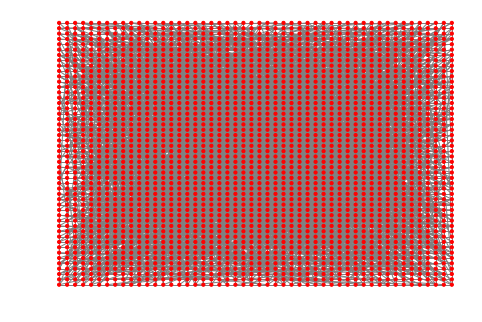

In [14]:
node_sizes = [10 for n in G.nodes()]
nx.draw(G,pos=pos,node_size=node_sizes,edge_color='gray')

### จัดการการติดเชื้อ
จะเก็บใน `infected`

In [15]:
infected = dict([(u,False) for u in G.nodes()])

In [16]:
def plot_infected(filename):
    node_colors = []
    for u in G.nodes():
        if infected[u]:
            node_colors.append('r')
        else:
            node_colors.append('b')
    plt.clf()
    nx.draw(G, pos=pos, node_size=node_sizes, node_color=node_colors, edge_color='gray')
    plt.savefig(filename)

In [17]:
infection_rate = 0.5

In [18]:
infected = dict([(u,False) for u in G.nodes()])

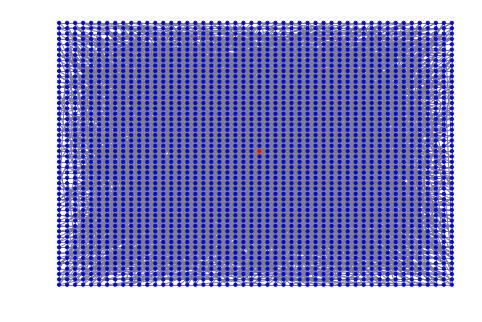

In [19]:
s = (25,25)
infected[s] = True
recently_infected = [s]
plot_infected('inf0.png')

In [20]:
rounds = 10

Round 0: 2 newly infected nodes
Round 1: 8 newly infected nodes
Round 2: 18 newly infected nodes
Round 3: 36 newly infected nodes
Round 4: 77 newly infected nodes
Round 5: 188 newly infected nodes
Round 6: 361 newly infected nodes
Round 7: 557 newly infected nodes
Round 8: 641 newly infected nodes
Round 9: 397 newly infected nodes


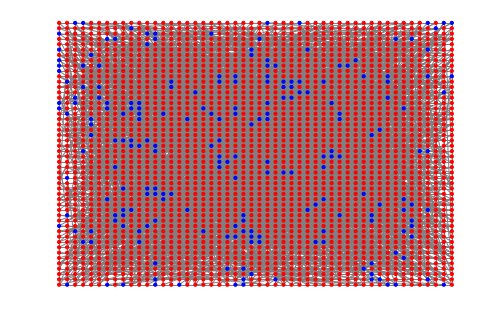

In [21]:
from random import random

for i in range(rounds):
    newly_infected = []
    for u in recently_infected:
        for v in G[u].keys():
            if infected[v]:
                continue
            if random() < infection_rate:
                infected[v] = True
                newly_infected.append(v)
    print('Round {0}: {1} newly infected nodes'.format(i,len(newly_infected)))
    recently_infected = newly_infected
    plot_infected('inf%d.png' % (i+1,))
            